In [1]:
import pandas as pd 
import seaborn as sns 	
import statsmodels.api as sm	
import statsmodels.formula.api as smf
from scipy import stats     
import matplotlib.pyplot as plt          
import seaborn as sns                   
import plotly as plot                     
import warnings
warnings.filterwarnings('ignore')
from pandasql import sqldf
from IPython.display import display
import numpy as np		
from sqlalchemy import create_engine
from geopy.distance import geodesic

# 6. Exploratory Data Analysis (EDA) with Python:

# What are the dimensions (number of rows and columns) of the dataset?

In [3]:
cc_data = pd.read_csv('cc_data.csv')
cc_data.shape

(389002, 24)

In [4]:
# 389002 Rows # 24 Columns

In [5]:
cc_data['trans_date'] = pd.to_datetime(cc_data['trans_date'])

In [6]:
cc = cc_data
cc.head(5)

,idx,trans_date,trans_time,cc_num,merchant,category,amt,first_name,last_name,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,11,2019-01-01,12:06:00 AM,151621,Kerluke-Abshire,shopping_net,7.77,Theresa,Blackwell,F,...,39.3716,-77.8229,1925,Systems developer,02/14/1966,3c74776e558f1499a7824b556e474b1d,1325376413,40.103866,-78.624459,0
1,20,2019-01-01,12:13:00 AM,125459,Bauch-Raynor,grocery_pos,57.34,Gregory,Graham,M,...,42.7280,-71.1810,47249,Market researcher,11/22/1980,139a1bee15be607d79fe173bfcb2502a,1325376788,42.268760,-71.217297,0
2,30,2019-01-01,12:22:00 AM,273,"Kihn, Abernathy and Douglas",shopping_net,3.66,Tammie,Harper,F,...,43.7575,-122.4810,597,Forensic psychologist,05/19/1961,870c92b288a974a2faf1f24b05c27e33,1325377356,44.278191,-121.815161,0
3,44,2019-01-01,12:32:00 AM,182351,Koepp-Witting,grocery_pos,130.40,Mary,Juarez,F,...,42.9385,-88.3950,2328,Applications developer,6/1/1942,14a6e29ac65424550ea7e7c9f551dbb8,1325377935,42.236269,-88.397336,0
4,46,2019-01-01,12:33:00 AM,218521,"Schaefer, Maggio and Daugherty",gas_transport,55.78,Carlos,Chung,M,...,34.4959,-86.2590,5901,Curator,07/25/1972,392529cae1f1f1647093732a8f319c50,1325378031,35.255978,-86.041872,0


# How many unique values are there in each categorical variable?

In [8]:
print(cc.nunique())

idx           389002
trans_date       537
trans_time      2520
cc_num        245704
merchant         693
category          14
amt            33505
first_name       352
last_name        481
gender             2
street           979
city             890
state             51
zip              966
lat              964
long             965
city_pop         875
job              492
dob              964
trans_num     389002
unix_time     387019
merch_lat     384468
merch_long    387153
is_fraud           2
dtype: int64


## Creating another data_frame we have the original, and the second is fraud only, our target variable

In [10]:
fraudulent_transactions = cc[cc['is_fraud'] == 1] 

In [11]:
fraud = pd.DataFrame(fraudulent_transactions)

In [12]:
# Creating Alias ft for new DF-fraud aka ft

In [163]:
ft = fraud
ft

,idx,trans_date,trans_time,cc_num,merchant,category,amt,first_name,last_name,gender,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Month
1040,3600,2019-03-01,1:35:00 AM,2822,Koepp-Parker,grocery_pos,332.35,Misty,Hart,F,...,-98.4590,1595797,Horticultural consultant,10/28/1960,97903213a2fd7e53bbaa60807144a505,1325554552,29.320662,-97.937219,1,3
1060,3671,2019-03-01,3:17:00 AM,371999,Strosin-Cruickshank,grocery_pos,315.34,Misty,Hart,F,...,-98.4590,1595797,Horticultural consultant,10/28/1960,0ffc2b7dae4c33883f14ac60283d4027,1325560656,28.953283,-97.806528,1,3
1356,4654,2019-03-01,10:21:00 PM,120898,Fisher Inc,shopping_net,942.62,Jason,Murphy,M,...,-81.7266,885,Soil scientist,09/15/1988,41b9e040c87e3ec6928ea9f86c571774,1325629275,35.765890,-81.951839,1,3
1367,4693,2019-03-01,10:58:00 PM,351535,Mosciski Group,travel,4.50,Heather,Chase,F,...,-79.6607,1472,Public affairs consultant,7/3/1941,2751eef2242b86fba1c3e6c1bb6a7022,1325631524,39.492341,-78.859114,1,3
1372,4706,2019-03-01,11:09:00 PM,205865,Morissette PLC,shopping_pos,821.96,Jason,Murphy,M,...,-81.7266,885,Soil scientist,09/15/1988,b7941dbeaf57c1dd33db619996852b0a,1325632191,35.772593,-81.593183,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387939,1293108,2020-06-20,02:01:00 AM,293487,"Kuhic, Bins and Pfeffer",shopping_net,1006.04,Joanne,Williams,F,...,-110.4360,302,"Sales professional, IT",01/17/1990,85557b52e6187f5a4c512a947418b598,1371693670,41.205200,-111.212336,1,6
388540,1295108,2020-06-20,10:29:00 PM,277676,Kassulke PLC,shopping_net,1064.44,Erika,Gonzalez,F,...,-83.9862,13061,"Editor, magazine features",06/18/1959,843c2d9939cd8bed31ca120ab175ad2b,1371767340,38.220812,-84.138702,1,6
388552,1295149,2020-06-20,10:44:00 PM,289411,Ernser-Feest,home,264.64,Joanne,Williams,F,...,-110.4360,302,"Sales professional, IT",01/17/1990,6dcf89d1dded8fd470ff65beb7380e93,1371768282,40.532013,-110.541338,1,6
388558,1295166,2020-06-20,10:54:00 PM,271041,Stiedemann Ltd,food_dining,112.06,Joanne,Williams,F,...,-110.4360,302,"Sales professional, IT",01/17/1990,32513404a69a51a86da9e0cf6832e568,1371768841,41.111935,-110.198219,1,6


# What is the distribution of numerical variables in the dataset?

In [15]:
# Histograms, and box plots show distribution very well

## Original Dataset Distribution

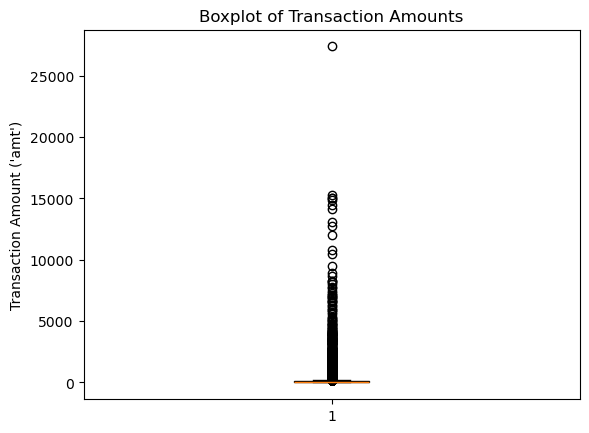

In [17]:
plt.boxplot(cc['amt'], vert=True, patch_artist=True)
plt.ylabel("Transaction Amount ('amt')")
plt.title("Boxplot of Transaction Amounts")
plt.show()

This really shows and visualizes the outliers in the original dataset and why it would make a poor histogram as is

In [19]:
# Now we will make a histogram showing just FRAUD transactions

## Fraud Distirbution

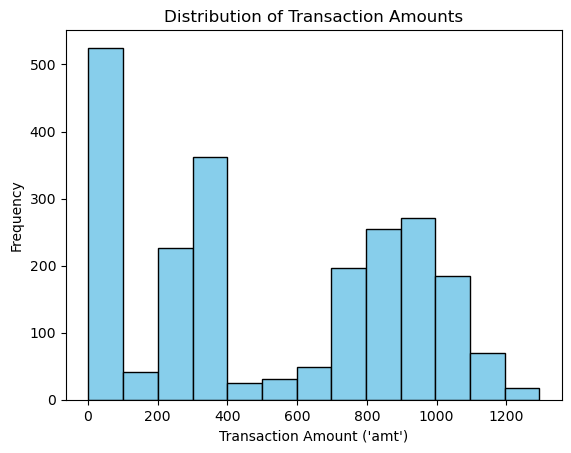

In [21]:
plt.hist(ft['amt'], bins='auto', color='skyblue', edgecolor='black')
plt.xlabel("Transaction Amount ('amt')")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amounts")
plt.show()

We see a lot of small transactions and a lot of medium to large. One idea is that they might start with a small transaction, and then go big?

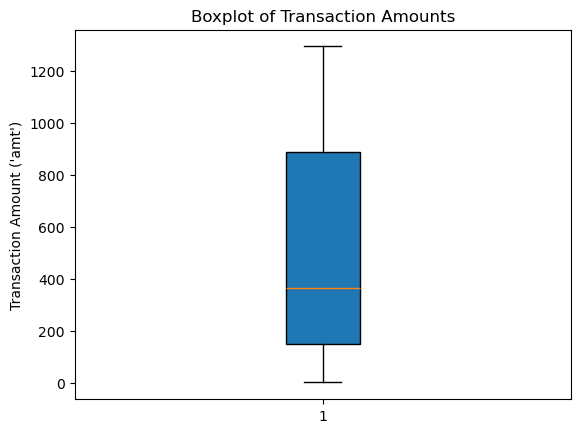

In [23]:
plt.boxplot(ft['amt'], vert=True, patch_artist=True)
plt.ylabel("Transaction Amount ('amt')")
plt.title("Boxplot of Transaction Amounts")
plt.show()

This definitley helps visualize better our range of values for the fraud activity

# Are there any missing values in the dataset? If so, how should they be handled?

In [26]:
# Check for missing Data --- data_name ----- .isna().sum()
# Duplicate check ---- data_frame ---- .duplicated().sum()

In [27]:
cc.duplicated().sum()

0

In [28]:
cc.isna().sum()

idx           0
trans_date    0
trans_time    0
cc_num        0
merchant      0
category      0
amt           0
first_name    0
last_name     0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
trans_num     0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

Since we are using the origianl dataset that encompasses everything we can say its safe that the new df -
ft doesnt have any missing values or duplicates either

In [30]:
# There is no missing data or duplicates!

# What are the summary statistics (mean, median, min, max, etc.) for numerical variables?

In [32]:
# Og DataFrame aka. cc_data and all the numerical values

In [33]:
numerical_variables = cc.select_dtypes(include=['int64', 'float64'])
numerical_variables.describe()

,idx,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,3.890020e+05,389002.000000,389002.000000,389002.000000,389002.000000,389002.000000,3.890020e+05,3.890020e+05,389002.000000,389002.000000,389002.000000
mean,6.485205e+05,194541.207747,70.442148,48818.064295,38.533121,-90.237664,8.868084e+04,1.349251e+09,38.531683,-90.236674,0.005789
std,3.745744e+05,112488.573414,162.203915,26879.383224,5.074596,13.745855,3.012101e+05,1.285085e+07,5.109400,13.757311,0.075866
min,1.100000e+01,2.000000,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.669638,0.000000
25%,3.241842e+05,96750.000000,9.660000,26237.000000,34.620500,-96.798000,7.430000e+02,1.338751e+09,34.719394,-96.905445,0.000000
50%,6.486485e+05,194730.500000,47.570000,48174.000000,39.354300,-87.476900,2.456000e+03,1.349267e+09,39.361065,-87.446843,0.000000
75%,9.735032e+05,292034.750000,83.077500,72011.000000,41.940400,-80.158000,2.032800e+04,1.359460e+09,41.956012,-80.253831,0.000000
max,1.296674e+06,389003.000000,27390.120000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371817e+09,67.064277,-66.956540,1.000000


In [34]:
# Fraud DataFrame aka ft and all the numerical values

In [35]:
numerical_variables2 = ft.select_dtypes(include=['int64', 'float64'])
numerical_variables2.describe()

,idx,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,2.252000e+03,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2.252000e+03,2.252000e+03,2252.000000,2252.000000,2252.0
mean,6.184759e+05,196621.158526,518.328677,48388.172735,38.708897,-89.989707,9.332321e+04,1.348145e+09,38.692801,-89.993095,1.0
std,4.010005e+05,113162.538799,389.127281,27014.699925,5.161772,14.030098,3.298287e+05,1.383283e+07,5.220276,14.049869,0.0
min,3.600000e+03,52.000000,1.180000,1330.000000,24.655700,-165.672300,2.300000e+01,1.325555e+09,24.010070,-165.986117,1.0
25%,2.320970e+05,101407.750000,147.882500,26327.250000,35.173000,-96.786900,7.370000e+02,1.335529e+09,35.061926,-96.695947,1.0
50%,6.358230e+05,195331.500000,365.285000,46510.000000,39.523600,-86.859200,2.449500e+03,1.348796e+09,39.472112,-87.085624,1.0
75%,9.813190e+05,297466.500000,888.342500,70451.750000,42.195625,-80.162900,1.914250e+04,1.359844e+09,42.133606,-80.305170,1.0
max,1.295257e+06,388865.000000,1294.830000,99783.000000,66.693300,-68.556500,2.906700e+06,1.371771e+09,67.064277,-68.623294,1.0


# Is there any correlation between numerical variables? If so, how strong is the correlation?

### First going to run tests on the original and then on the new dataframe
-1.0: Perfect negative linear correlation (as one variable increases, the other decreases perfectly).

0.0: No linear correlation.

+1.0: Perfect positive linear correlation (as one variable increases, the other increases perfectly).

## amt Correlation's

In [39]:
correlation_with_amt = numerical_variables.corr()['amt'].sort_values(ascending=False)
print(correlation_with_amt)

amt           1.000000
is_fraud      0.210706
city_pop      0.007271
cc_num        0.002477
zip           0.001756
unix_time     0.000780
idx           0.000779
merch_lat    -0.000314
lat          -0.000445
long         -0.000517
merch_long   -0.000578
Name: amt, dtype: float64


In [40]:
correlation_with_amt2 = numerical_variables2.corr()['amt'].sort_values(ascending=False)
print(correlation_with_amt2)

amt           1.000000
idx           0.042356
unix_time     0.041803
lat           0.037503
merch_lat     0.037016
cc_num        0.028312
city_pop      0.011495
zip          -0.001802
merch_long   -0.004117
long         -0.004351
is_fraud           NaN
Name: amt, dtype: float64


## city_pop Correlations

In [42]:
correlation_with_pop = numerical_variables.corr()['city_pop'].sort_values(ascending=False)
print(correlation_with_pop)

city_pop      1.000000
zip           0.078373
amt           0.007271
is_fraud      0.001176
cc_num       -0.000012
unix_time    -0.001766
idx          -0.001800
long         -0.053461
merch_long   -0.053468
merch_lat    -0.154767
lat          -0.155972
Name: city_pop, dtype: float64


In [43]:
correlation_with_pop2 = numerical_variables2.corr()['city_pop'].sort_values(ascending=False)
print(correlation_with_pop2)

city_pop      1.000000
zip           0.096093
amt           0.011495
unix_time     0.002418
idx           0.001958
cc_num       -0.003352
merch_long   -0.058242
long         -0.058803
lat          -0.169938
merch_lat    -0.171261
is_fraud           NaN
Name: city_pop, dtype: float64


## cc_num Correlations

In [45]:
correlation_with_cc_num = numerical_variables.corr()['cc_num'].sort_values(ascending=False)
print(correlation_with_cc_num)

cc_num        1.000000
merch_lat     0.002700
lat           0.002671
amt           0.002477
is_fraud      0.001411
zip           0.000547
idx           0.000038
city_pop     -0.000012
unix_time    -0.000069
long         -0.001340
merch_long   -0.001450
Name: cc_num, dtype: float64


In [46]:
correlation_with_cc_num2 = numerical_variables2.corr()['cc_num'].sort_values(ascending=False)
print(correlation_with_cc_num2)

cc_num        1.000000
zip           0.033795
amt           0.028312
merch_lat     0.025357
lat           0.022703
idx           0.004687
unix_time     0.003964
city_pop     -0.003352
merch_long   -0.036135
long         -0.037426
is_fraud           NaN
Name: cc_num, dtype: float64


In [47]:
# Seems to have some stronger correlations with some of the variables when we target only fraudulent transactions
# But still seeing a weak correlation all around, we already kind of expect that fraud is the result of an amt

# How does the distribution of an amt differ across is_fraud categories?

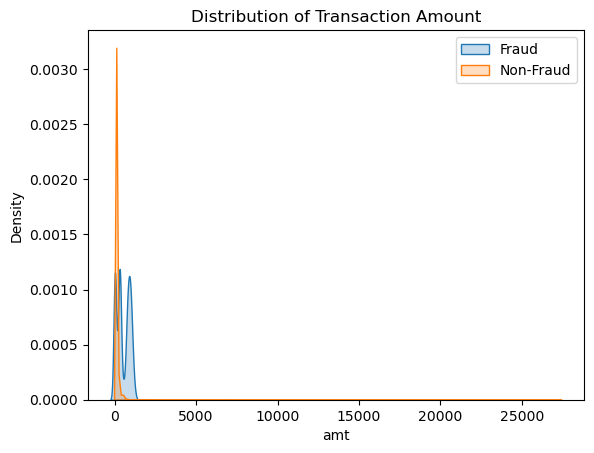

In [49]:
sns.kdeplot(data=cc[cc['is_fraud'] == 1]['amt'], label='Fraud', shade=True)
sns.kdeplot(data=cc[cc['is_fraud'] == 0]['amt'], label='Non-Fraud', shade=True)
plt.title('Distribution of Transaction Amount')
plt.legend()
plt.show()

Non-Fraudulent Transactions: These are heavily skewed toward lower transaction amounts, indicating most non-fraud transactions involve smaller amounts.

Fraudulent Transactions: While also concentrated at lower amounts, they appear to have a higher density at medium to large transaction amounts compared to non-fraudulent transactions, which could indicate a tactic where fraudsters attempt higher-value transactions.

# Are there any outliers in the city_pop and amt? 

In [52]:
Q1_amt = cc['amt'].quantile(0.25)
Q3_amt = cc['amt'].quantile(0.75)
IQR_amt = Q3_amt - Q1_amt
lower_bound_amt = Q1_amt - 1.5 * IQR_amt
upper_bound_amt = Q3_amt + 1.5 * IQR_amt

Q1_city_pop = cc['city_pop'].quantile(0.25)
Q3_city_pop = cc['city_pop'].quantile(0.75)
IQR_city_pop = Q3_city_pop - Q1_city_pop
lower_bound_city_pop = Q1_city_pop - 1.5 * IQR_city_pop
upper_bound_city_pop = Q3_city_pop + 1.5 * IQR_city_pop

print("Amt Outlier Range:", lower_bound_amt, upper_bound_amt)
print("City_Pop Outlier Range:", lower_bound_city_pop, upper_bound_city_pop)

Amt Outlier Range: -100.46625 193.20375
City_Pop Outlier Range: -28634.5 49705.5


in the Amt Outlier : The upper limit of 193.20 indicates that transactions above this amount are rare, and these might include fraudulent transactions or high-value outliers.

The upper limit of 49,705.5 suggests that most city populations in the data fall below this threshold. Larger city populations beyond this are considered atypical and might warrant special attention.

The negative in both is not possible for city_pop and unlikely for the amt.

In [54]:
# Now going to see the amount of outliers based on the upper bounds determined above

In [55]:
def count_high_amt(cc, threshold=193.20):
    # Filtering rows where 'amt' is above the threshold
    count = len(cc[cc['amt'] > threshold])
    return count

# Use the function
high_amt_count = count_high_amt(cc)
print(f"Number of transactions above threshold: {high_amt_count}")

def count_high_pop(cc, threshold=49705.5):
    # Filtering rows where 'city_pop' is above the threshold
    count = len(cc[cc['city_pop'] > threshold])
    return count

# Use the function
high_pop_count = count_high_pop(cc)
print(f"Number of city population entries above threshold: {high_pop_count}")

Number of transactions above threshold: 20377
Number of city population entries above threshold: 72813


### These are the number of outliers...

Number of transactions above threshold: 20377
Number of city population entries above threshold: 72813

# Are there any trends or patterns in the data over time (if applicable)?

In [58]:
# Creating a month row with a new alias to look at a by month 

In [59]:
ft2 = ft

In [60]:
ft2['Month'] = ft2['trans_date'].dt.month
ft2.head(5)

,idx,trans_date,trans_time,cc_num,merchant,category,amt,first_name,last_name,gender,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Month
1040,3600,2019-03-01,1:35:00 AM,2822,Koepp-Parker,grocery_pos,332.35,Misty,Hart,F,...,-98.4590,1595797,Horticultural consultant,10/28/1960,97903213a2fd7e53bbaa60807144a505,1325554552,29.320662,-97.937219,1,3
1060,3671,2019-03-01,3:17:00 AM,371999,Strosin-Cruickshank,grocery_pos,315.34,Misty,Hart,F,...,-98.4590,1595797,Horticultural consultant,10/28/1960,0ffc2b7dae4c33883f14ac60283d4027,1325560656,28.953283,-97.806528,1,3
1356,4654,2019-03-01,10:21:00 PM,120898,Fisher Inc,shopping_net,942.62,Jason,Murphy,M,...,-81.7266,885,Soil scientist,09/15/1988,41b9e040c87e3ec6928ea9f86c571774,1325629275,35.765890,-81.951839,1,3
1367,4693,2019-03-01,10:58:00 PM,351535,Mosciski Group,travel,4.50,Heather,Chase,F,...,-79.6607,1472,Public affairs consultant,7/3/1941,2751eef2242b86fba1c3e6c1bb6a7022,1325631524,39.492341,-78.859114,1,3
1372,4706,2019-03-01,11:09:00 PM,205865,Morissette PLC,shopping_pos,821.96,Jason,Murphy,M,...,-81.7266,885,Soil scientist,09/15/1988,b7941dbeaf57c1dd33db619996852b0a,1325632191,35.772593,-81.593183,1,3


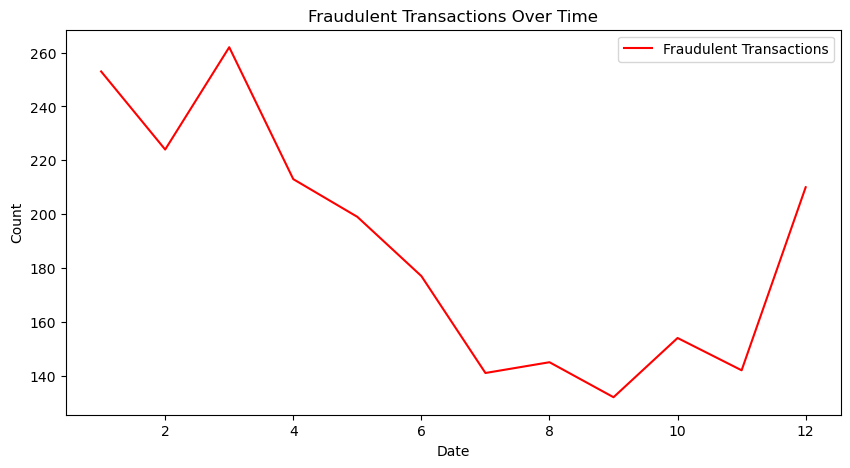

In [61]:
fraud_over_time = ft2.groupby('Month').size()

fraud_over_time.plot(kind='line', figsize=(10, 5), color='red', label='Fraudulent Transactions')

plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

This is a combination of years by month.

We see a lot more fraud that happens during the first few months of the year, and rising at the end of the year, this could possibly correlate with winter Holidays, and increased spending etc... would need to dive a bit deeper to really be able to interpret all of this.

# How does the target variable (if available) distribute across different categories?

In [64]:
#  taking a look at fraud count for each gender

In [65]:
ffg = ft.groupby(['gender']).size().reset_index(name='fraud_count')
ffg

,gender,fraud_count
0,F,1141
1,M,1111


This tracks with our numbers from excel!

In [67]:
# Taking a look at the Fraud count by Female Gender, and category

In [68]:
fft = ft[ft['gender'] == 'F'] 
fft1 = fft.groupby(['category']).size().reset_index(name='fraud_count').sort_values(by='fraud_count', ascending=False)
fft1.head()

,category,fraud_count
4,grocery_pos,229
11,shopping_net,188
12,shopping_pos,137
8,misc_net,120
2,gas_transport,88


In [69]:
# Taking a look at the Fraud count by Male Gender, and category

In [70]:
ffm = ft[ft['gender'] == 'M'] 
ffm1 = ffm.groupby(['category']).size().reset_index(name='fraud_count').sort_values(by='fraud_count', ascending=False)
ffm1.head()

,category,fraud_count
11,shopping_net,290
4,grocery_pos,289
8,misc_net,167
12,shopping_pos,116
2,gas_transport,105


In [71]:
# Looking at total fraud amounts by category

In [72]:
ft_cat = ft[['category', 'amt']]
ft_cat1 = ft_cat.groupby(['category'])['amt'].agg(Fraud_Total=('sum')).sort_values(by='Fraud_Total', ascending=False)
ft_cat1

,Fraud_Total
category,
shopping_net,476128.02
misc_net,227371.27
shopping_pos,221798.22
grocery_pos,162370.29
entertainment,34034.93
misc_pos,16893.53
home,16376.52
food_dining,4978.28
gas_transport,2386.15


In [73]:
# Fraud By State

In [74]:
ftcs2 = ft.groupby(['state']).size().reset_index(name='fraud_count').sort_values(by='fraud_count', ascending=False)
ftcs2.head(5)

,state,fraud_count
33,NY,162
42,TX,135
37,PA,133
34,OH,101
4,CA,90


In [75]:
# Fraud By City, State

In [76]:
ftcs = ft.groupby(['city', 'state',]).size().reset_index(name='fraud_count').sort_values(by='fraud_count', ascending=False)
ftcs.head(5)

,city,state,fraud_count
279,Houston,TX,13
433,Naples,FL,12
280,Hovland,MN,9
622,Topeka,KS,9
396,Mill Creek,PA,9


In [77]:
# Fraud By city_pop

In [78]:
ft_pop = ft.groupby(['city_pop']).size().reset_index(name='fraud_count').sort_values(by='fraud_count', ascending=False)
ft_pop.head(5)

,city_pop,fraud_count
653,2906700,13
612,276002,12
77,302,11
31,137,10
205,1126,10


In [79]:
# Fraud By job

In [80]:
ft_job = ft.groupby(['job']).size().reset_index(name='fraud_count').sort_values(by='fraud_count', ascending=False)
ft_job.head(5)

,job,fraud_count
251,Materials engineer,23
338,Quantity surveyor,18
359,"Sales professional, IT",17
420,Trading standards officer,16
115,"Development worker, international aid",15


In [81]:
ft_names = ft.groupby(['first_name', 'last_name', 'dob']).size().reset_index(name='fraud_count').sort_values(by='fraud_count', ascending=False)
ft_names

,first_name,last_name,dob,fraud_count
520,Micheal,Walters,5/7/2001,9
549,Pamela,Curtis,12/17/1986,9
560,Paula,Estrada,5/3/1972,8
121,Christie,Williamson,08/20/1971,8
697,Victoria,Fleming,4/12/1995,8
...,...,...,...,...
601,Ronald,Carson,06/30/1965,1
283,Jamie,Robinson,01/16/1960,1
274,James,Greene,03/18/1998,1
267,Jacqueline,Johnson,01/30/1961,1


first_name: Michael, last_name: Walters, dob: 5/7/2001

In [83]:
ft_name1 = ft[(ft['first_name'] == 'Micheal') & (ft['last_name'] == 'Walters') & (ft['dob'] == '5/7/2001')].sort_values(by='trans_date', ascending=True)
ft_name1

,idx,trans_date,trans_time,cc_num,merchant,category,amt,first_name,last_name,gender,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Month
22459,74891,2019-02-13,02:24:00 PM,66227,Lebsack and Sons,misc_net,881.13,Micheal,Walters,M,...,-90.0476,272,Freight forwarder,5/7/2001,750eaa22b13b16f3191478a0ff1174c1,1329143093,47.453881,-90.558396,1,2
22487,74979,2019-02-13,03:54:00 PM,238810,Kuhic LLC,shopping_net,1002.04,Micheal,Walters,M,...,-90.0476,272,Freight forwarder,5/7/2001,edf9e2b2aaf6641b5a589794348f2c87,1329148462,47.389709,-89.244866,1,2
22545,75149,2019-02-13,06:34:00 PM,227907,Bednar Inc,travel,10.99,Micheal,Walters,M,...,-90.0476,272,Freight forwarder,5/7/2001,76c0b8581c37893ff1de24004c719cae,1329158045,47.608453,-89.221899,1,2
22630,75465,2019-02-13,11:54:00 PM,169255,"Schmeler, Bashirian and Price",shopping_net,1024.04,Micheal,Walters,M,...,-90.0476,272,Freight forwarder,5/7/2001,a4699e23922ca7a2a8d78f003cbfb07f,1329177241,47.371060,-89.047686,1,2
21601,71941,2019-12-02,12:05:00 AM,15763,Kuphal-Bartoletti,misc_net,911.75,Micheal,Walters,M,...,-90.0476,272,Freight forwarder,5/7/2001,4bd2d695515919e89a25258335fc2be1,1329005150,48.447446,-89.426637,1,12
21738,72348,2019-12-02,5:32:00 AM,55017,"Huel, Hammes and Witting",grocery_pos,306.23,Micheal,Walters,M,...,-90.0476,272,Freight forwarder,5/7/2001,358c469bac7e3d569e73e1334840bc34,1329024745,48.793623,-89.969070,1,12
22215,74072,2019-12-02,10:20:00 PM,58295,Volkman-Predovic,shopping_net,1089.43,Micheal,Walters,M,...,-90.0476,272,Freight forwarder,5/7/2001,b0c0842c6b4aa941554160e68d02b187,1329085210,47.445174,-90.996543,1,12
22230,74109,2019-12-02,10:36:00 PM,335765,Kozey-Boehm,shopping_net,937.62,Micheal,Walters,M,...,-90.0476,272,Freight forwarder,5/7/2001,0755f2ee3bb43361e9ccb91650d00d7c,1329086189,48.433276,-89.726652,1,12
22284,74292,2019-12-02,11:58:00 PM,351456,Stiedemann Inc,misc_pos,8.24,Micheal,Walters,M,...,-90.0476,272,Freight forwarder,5/7/2001,9930ced846a4f3082235bf75f89e31cd,1329091135,47.120308,-89.314686,1,12


first_name: Pamela, last_name: Curtis, dob: 12/17/1986

In [85]:
ft_name2 = ft[(ft['first_name'] == 'Pamela') & (ft['last_name'] == 'Curtis') & (ft['dob'] == '12/17/1986')].sort_values(by='trans_date', ascending=True)
ft_name2

,idx,trans_date,trans_time,cc_num,merchant,category,amt,first_name,last_name,gender,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Month
347455,1158434,2020-04-28,02:06:00 AM,339932,Pouros-Haag,shopping_pos,685.42,Pamela,Curtis,F,...,-77.8967,1334,Archaeologist,12/17/1986,d0267ee628336b74d058a0766702ddbe,1367114801,40.570449,-77.889747,1,4
347478,1158500,2020-04-28,02:47:00 AM,242025,Stamm-Rodriguez,misc_pos,832.31,Pamela,Curtis,F,...,-77.8967,1334,Archaeologist,12/17/1986,aeddf53311c52cf2958bca4fc266618f,1367117228,41.368025,-77.444737,1,4
347505,1158581,2020-04-28,03:34:00 AM,198430,Botsford Ltd,shopping_pos,946.77,Pamela,Curtis,F,...,-77.8967,1334,Archaeologist,12/17/1986,4d37f452af7f0870c17e052925077ee8,1367120087,39.856107,-76.906475,1,4
348060,1160454,2020-04-28,06:21:00 PM,258626,Treutel-King,travel,9.09,Pamela,Curtis,F,...,-77.8967,1334,Archaeologist,12/17/1986,540f2a4899419aa06b648ec5810663e9,1367173266,40.770262,-77.059579,1,4
348359,1161467,2020-04-29,02:35:00 AM,367081,"Heller, Gutmann and Zieme",grocery_pos,339.18,Pamela,Curtis,F,...,-77.8967,1334,Archaeologist,12/17/1986,e90cdca2a7cc1039ec19a1b6150b705f,1367202935,40.460179,-77.552921,1,4
348378,1161521,2020-04-29,03:33:00 AM,388270,Kiehn Inc,grocery_pos,353.87,Pamela,Curtis,F,...,-77.8967,1334,Archaeologist,12/17/1986,e7ca0a6a96b7b8f3c6578ed4167b28dd,1367206419,41.048656,-77.220550,1,4
348737,1162748,2020-04-29,10:44:00 PM,122160,"Schroeder, Hauck and Treutel",entertainment,549.34,Pamela,Curtis,F,...,-77.8967,1334,Archaeologist,12/17/1986,26313c7215742c0319853c92d5666280,1367275474,39.699138,-77.527034,1,4
348747,1162777,2020-04-29,11:07:00 PM,376285,Parker-Kunde,personal_care,19.08,Pamela,Curtis,F,...,-77.8967,1334,Archaeologist,12/17/1986,af6dd7b5f64739e041e28af3bf5d0109,1367276864,39.803992,-78.797889,1,4
348768,1162844,2020-04-29,11:46:00 PM,37106,"Langosh, Wintheiser and Hyatt",food_dining,121.15,Pamela,Curtis,F,...,-77.8967,1334,Archaeologist,12/17/1986,1eb7f996962ab61cc5813485de803024,1367279178,40.435621,-78.126380,1,4


first_name: Paula, last_name: Estrada, dob: 5/3/1972

In [87]:
ft_name3 = ft[(ft['first_name'] == 'Paula') & (ft['last_name'] == 'Estrada') & (ft['dob'] == '5/3/1972')].sort_values(by='trans_date', ascending=True)
ft_name3

,idx,trans_date,trans_time,cc_num,merchant,category,amt,first_name,last_name,gender,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Month
313779,1046820,2020-10-03,1:11:00 AM,331757,"Langworth, Boehm and Gulgowski",shopping_net,991.51,Paula,Estrada,F,...,-97.5936,343,"Development worker, international aid",5/3/1972,00274c0cef970be83a2f2b75da3b8a10,1362877918,43.179504,-97.207922,1,10
313790,1046846,2020-10-03,1:28:00 AM,302593,Marks Inc,gas_transport,7.61,Paula,Estrada,F,...,-97.5936,343,"Development worker, international aid",5/3/1972,2cbedfecdb3594a19c965e57b1b885c0,1362878910,43.356988,-96.770897,1,10
313861,1047089,2020-10-03,3:59:00 AM,406,Kris-Weimann,misc_net,690.49,Paula,Estrada,F,...,-97.5936,343,"Development worker, international aid",5/3/1972,fb1ddd251bbec9b84c9755e856d51723,1362887989,43.254214,-98.267759,1,10
313907,1047208,2020-10-03,4:59:00 AM,226100,Kiehn Inc,grocery_pos,331.33,Paula,Estrada,F,...,-97.5936,343,"Development worker, international aid",5/3/1972,d18c55035998e461aa9040e254b74925,1362891561,44.228731,-98.330520,1,10
314684,1049756,2020-10-03,11:54:00 PM,106307,Bode-Rempel,kids_pets,20.59,Paula,Estrada,F,...,-97.5936,343,"Development worker, international aid",5/3/1972,944373e43c3610710c257bf9cfe647ad,1362959653,43.714870,-98.447469,1,10
314831,1050245,2020-11-03,9:49:00 AM,336993,Jaskolski-Vandervort,misc_net,784.85,Paula,Estrada,F,...,-97.5936,343,"Development worker, international aid",5/3/1972,aaff1d3fd7f50c3f7c972dd22403d048,1362995359,43.259990,-98.429235,1,11
315093,1051063,2020-11-03,8:57:00 PM,249193,"Koss, Hansen and Lueilwitz",home,243.63,Paula,Estrada,F,...,-97.5936,343,"Development worker, international aid",5/3/1972,6c8e3d9572d57e424643e157d29b4554,1363035470,42.868053,-98.282839,1,11
315141,1051210,2020-11-03,10:49:00 PM,185524,"Nicolas, Hills and McGlynn",entertainment,515.79,Paula,Estrada,F,...,-97.5936,343,"Development worker, international aid",5/3/1972,15fdc408bbed0875bc301e72bb8bfdde,1363042148,43.185239,-97.510611,1,11


first_name: Christie, last_name: Williamson, dob: 08/20/1971

In [89]:
ft_name4 = ft[(ft['first_name'] == 'Christie') & (ft['last_name'] == 'Williamson') & (ft['dob'] == '08/20/1971')].sort_values(by='trans_date', ascending=True)
ft_name4

,idx,trans_date,trans_time,cc_num,merchant,category,amt,first_name,last_name,gender,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Month
309899,1033765,2020-04-03,12:14:00 AM,358302,Kozey-Boehm,shopping_net,1008.54,Christie,Williamson,F,...,-95.3509,2036,Engineering geologist,08/20/1971,8950a5b276673252fbbac8d7b8fb520f,1362356089,42.390353,-94.690668,1,4
309915,1033809,2020-04-03,1:09:00 AM,163414,Deckow-O'Conner,grocery_pos,350.48,Christie,Williamson,F,...,-95.3509,2036,Engineering geologist,08/20/1971,80fd427a36369ecdf60283729842dd72,1362359375,42.321245,-95.486229,1,4
310332,1035279,2020-04-03,11:53:00 PM,65756,Labadie LLC,personal_care,19.90,Christie,Williamson,F,...,-95.3509,2036,Engineering geologist,08/20/1971,9282f408772d6bf419692c4d87a3ed21,1362441231,41.650784,-94.464620,1,4
310348,1035336,2020-05-03,12:49:00 AM,227299,"Haley, Jewess and Bechtelar",shopping_pos,835.85,Christie,Williamson,F,...,-95.3509,2036,Engineering geologist,08/20/1971,b13747f73ff5b0ac4649f1120c6a3dde,1362444559,41.308247,-94.594161,1,5
310759,1036753,2020-05-03,10:16:00 PM,173517,Reilly LLC,home,253.93,Christie,Williamson,F,...,-95.3509,2036,Engineering geologist,08/20/1971,95ffbfac1a63e60ad28dc9033152ab21,1362521808,41.046356,-96.051987,1,5
310761,1036759,2020-05-03,10:23:00 PM,89504,Medhurst Inc,home,277.72,Christie,Williamson,F,...,-95.3509,2036,Engineering geologist,08/20/1971,1a3d2cc016d57fe17cb2c872f2058670,1362522237,40.669511,-95.749574,1,5
310792,1036868,2020-05-03,11:43:00 PM,67604,Bednar PLC,kids_pets,19.41,Christie,Williamson,F,...,-95.3509,2036,Engineering geologist,08/20/1971,efb3ef205c331780b065680a31a25591,1362526995,41.009664,-94.481397,1,5
310795,1036883,2020-05-03,11:55:00 PM,97561,Daugherty LLC,kids_pets,24.09,Christie,Williamson,F,...,-95.3509,2036,Engineering geologist,08/20/1971,0790b75c6856a2bf55623967feeb5c0b,1362527711,40.886860,-96.287232,1,5


first_name: Victoria, last_name: Fleming, dob: 4/12/1995

In [91]:
ft_name5 = ft[(ft['first_name'] == 'Victoria') & (ft['last_name'] == 'Fleming') & (ft['dob'] == '4/12/1995')].sort_values(by='trans_date', ascending=True)
ft_name5

,idx,trans_date,trans_time,cc_num,merchant,category,amt,first_name,last_name,gender,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Month
280860,936896,2020-08-01,12:24:00 AM,57865,"Schultz, Simonis and Little",grocery_pos,300.00,Victoria,Fleming,F,...,-93.2433,2607,"Lecturer, further education",4/12/1995,b5001622f909259412bced4dd0dcc50a,1357604698,45.549500,-92.811351,1,8
281200,938036,2020-08-01,10:16:00 PM,233319,"Streich, Dietrich and Barton",shopping_net,921.03,Victoria,Fleming,F,...,-93.2433,2607,"Lecturer, further education",4/12/1995,220ded96b8126a6c16bc8809bd0b3162,1357683377,46.590960,-93.305322,1,8
281205,938054,2020-08-01,10:29:00 PM,66260,"Zboncak, Rowe and Murazik",shopping_net,1029.20,Victoria,Fleming,F,...,-93.2433,2607,"Lecturer, further education",4/12/1995,cc38c8cf0172ce7637deb0b2461fb5a1,1357684197,46.107728,-93.330630,1,8
281214,938071,2020-08-01,10:46:00 PM,68910,Goyette Inc,shopping_net,1205.11,Victoria,Fleming,F,...,-93.2433,2607,"Lecturer, further education",4/12/1995,f704d6323f819ec086cbbed1139f2acb,1357685217,45.723117,-93.823244,1,8
281260,938193,2020-09-01,12:52:00 AM,83219,Pacocha-O'Reilly,grocery_pos,294.28,Victoria,Fleming,F,...,-93.2433,2607,"Lecturer, further education",4/12/1995,00df4f8c95dcd5f078b0649f486f675d,1357692777,44.798713,-93.639619,1,9
281276,938228,2020-09-01,1:57:00 AM,36063,"Kerluke, Considine and Macejkovic",misc_net,739.41,Victoria,Fleming,F,...,-93.2433,2607,"Lecturer, further education",4/12/1995,56b66d7b0623693e8042341f7ed78a44,1357696631,45.591009,-92.441050,1,9
281379,938601,2020-09-01,9:51:00 AM,339412,"Moen, Reinger and Murphy",grocery_pos,310.18,Victoria,Fleming,F,...,-93.2433,2607,"Lecturer, further education",4/12/1995,cff4f9c7560d5734faeca88aaec0f66a,1357725105,45.135795,-94.217142,1,9
281623,939431,2020-09-01,10:18:00 PM,364623,Lemke-Gutmann,shopping_net,1015.85,Victoria,Fleming,F,...,-93.2433,2607,"Lecturer, further education",4/12/1995,ee5186380c4fdea101ffbed7d570c039,1357769880,46.228556,-93.406818,1,9


first_name: Jordan, last_name: May, dob: 5/7/1984

In [93]:
ft_name6 = ft[(ft['first_name'] == 'Jordan') & (ft['last_name'] == 'May') & (ft['dob'] == '5/7/1984')].sort_values(by='trans_date', ascending=True)
ft_name6

,idx,trans_date,trans_time,cc_num,merchant,category,amt,first_name,last_name,gender,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Month
315142,1051212,2020-11-03,10:50:00 PM,223477,"Labadie, Treutel and Bode",shopping_net,1067.57,Jordan,May,M,...,-97.6039,13602,Optometrist,5/7/1984,8e59eaa6b0053c3c1a5f61cb8430ea01,1363042200,32.93567,-97.356378,1,11


# Are there any unusual or unexpected values in the dataset that require further investigation?

Yes... The number of transactions outliers is: 20377 & number of city population entries that are outliers is: 72813

This greatly impacts the data and the way it is all perceived. 

# Are there any potential data entry errors or inconsistencies in the dataset?

I cleaned the data and made sure everything looked the same before I used Python to study it. I found some numbers that were a bit different from the rest and made the overall picture a little uneven, but nothing seemed to be abnormal, like the dates weren't in the future or anything strange like that etc...

# How does the distribution of numerical variables vary between different groups or segments of the dataset? What are the top factors that influence the target variable, if applicable?

The overall count of fraud incidents is fairly similar between males and females, with a slight edge to females. 'shopping_net' and 'grocery_pos' consistently rank high in the count of fraudulent transactions for both genders. However, the order is slightly different: 'shopping_net' is the top category for males, while 'grocery_pos' is the top category for females. 'misc_net' is also a significant category for both genders. 'shopping_net' stands out as the category with the highest total amount of fraudulent transactions, indicating that while it has a high frequency, the individual transactions also tend to be larger. 'grocery_pos', despite having a high count, has a lower total amount compared to 'shopping_net', 'misc_net', and 'shopping_pos', suggests smaller average transaction values in this category. Fraudulent transactions are not evenly distributed across states. New York (NY), Texas (TX), and Pennsylvania (PA) have the highest counts of fraud incidents. Fraud is also concentrated in specific cities within the high-fraud states (e.g., Houston, TX). Many city-state combinations have only a small number of fraudulent transactions, indicating a widespread but often low-frequency phenomenon. Generally, bigger cities in the dataset tend to have more reported fraudulent transactions, with the most populated ones showing the highest numbers. However, it's not a perfect correlation as some smaller cities also show surprisingly high fraud counts. Also, many cities of all sizes only have a single instance of fraud, meaning it's a problem that pops up in lots of different places, not just the big ones. Job occupation showed us that there are jobs more prone to fraud, the top 5 were 'Materials engineer', 'Quantity surveyor', 'Sales professional, IT', 'Trading standards officer', and 'Development worker, international aid'. After digging in deep into the fraud and grouping certain columns together such as first name, last name, and dob, a theme seems to jump out. It appeared that most people what had fraudulent purchases didn't just have one... there were multiple. When we grouped all that together, we went from seeing 2252 individual instances down to just 722 unique people. This definitely gave one of the more clear pictures of the actual activity behind fraud. Theres undeinably a pattern here, whether someone had fraud happen once or multiple times. It seems like a lot of these charges were for around a thousand dollars, and for those with multiple instances, it was often like one right after the other until maybe their card hit its limit or someone reported it.

# Write an analysis report on performing exploratory data analysis (EDA) using Python in the context of building a fraud detection system for the financial industry.

----------------Done in word document -----------